# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning Lab

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Suryansh Ambekar

**Student ID:** 202201090042

**Date of Submission:** 1 April

**Group Members**: Kaustubh Mahajan and Ayush Fating


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
# Install necessary libraries
!pip install kagglehub nltk scikit-learn wordcloud


In [ ]:
!pip uninstall nltk
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.11/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/nltk/*
Proceed (Y/n)? y
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.9 MB/s eta 0:00:00


In [1]:
# Import required libraries
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import kagglehub
import pandas as pd
from nltk.tag import pos_tag_sents
nltk.download('punkt')  # Sentence & word tokenization
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords removal
nltk.download('wordnet')  # Lemmatization
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('averaged_perceptron_tagger_eng')  # POS tagging
nltk.download('maxent_ne_chunker')  # Named Entity Recognition (NER)
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')  # Dictionary for NER

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_n

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [2]:
# Load dataset
#df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv")
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
# Explore dataset
print(df.info())
print(df.isnull().sum())  # Check for missing values
print(df['sentiment'].value_counts())  # Check label distribution

# Convert sentiment labels to binary (positive -> 1, negative -> 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Initialize text preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    return " ".join(tokens)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [3]:
# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)

# POS Tagging
#df['pos_tags'] = df['review'].apply(lambda x: pos_tag(word_tokenize(x)))
df_sample = df.sample(2000, random_state=42)  # Process only 5,000 samples
df_sample['tokenized_review'] = df_sample['review'].apply(word_tokenize)
df_sample['pos_tags'] = pos_tag_sents(df_sample['tokenized_review'].tolist())

# Named Entity Recognition (NER)
df_sample['ner'] = df_sample['pos_tags'].apply(ne_chunk)

# Generate Word Cloud
all_text = " ".join(df['processed_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

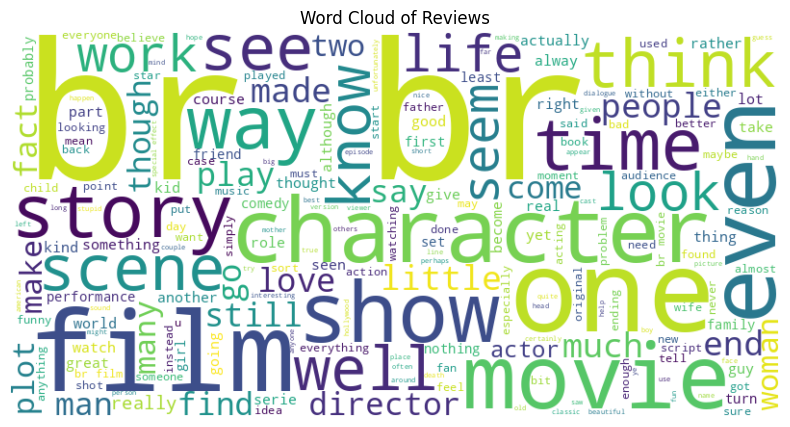

Vectorization complete.


In [4]:

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Vectorization
vectorizer_count = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

X_count = vectorizer_count.fit_transform(df['processed_review'])  # Count Vectorizer
X_tfidf = vectorizer_tfidf.fit_transform(df['processed_review'])  # TF-IDF Vectorizer

print("Vectorization complete.")

**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

Model Evaluation Metrics:
Accuracy : 0.8937
Precision: 0.8836
Recall   : 0.9087
F1-Score : 0.896


<Figure size 600x400 with 0 Axes>

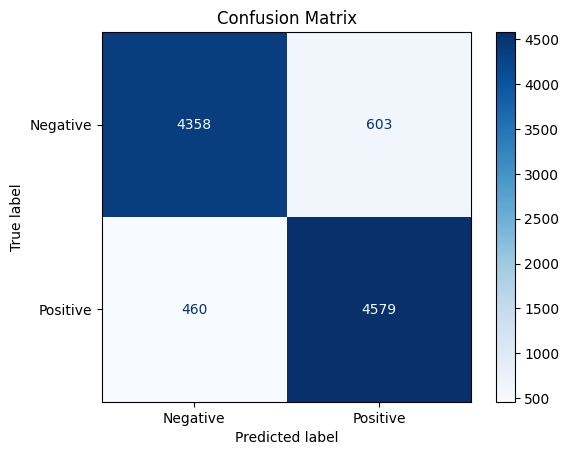

In [5]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Split the dataset (using TF-IDF features)
X = X_tfidf  # or use X_count for CountVectorizer
y = df['sentiment']

# 80% training, 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1-Score :", round(f1, 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Suryansh Ambekar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Suryansh Sanket Ambekar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion